Link to data: https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf/input

In [625]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import time
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# **Считывание данных**

In [626]:
sample = pd.read_csv('dataset/sample_submission.csv')
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Сразу можно сказать, что тип задачи: регрессия

Файл ниже является переводом файла dataset/data_describtion.txt
Он лежит на гите

In [627]:
cat dataset/data_help.txt

MSSubClass: Классификация типа жилого объекта

20 — Одноэтажный, 1946 г. и новее (все стили)
30 — Одноэтажный, 1945 г. и старше
40 — Одноэтажный с готовой мансардой
45 — Полутораэтажный с незавершённой отделкой
50 — Полутораэтажный с завершённой отделкой
60 — Двухэтажный, 1946+
70 — Двухэтажный, 1945 и старше
75 — Два с половиной этажа
80 — Раздельный/многоуровневый
85 — Дом с разделённым холлом
90 — Дуплекс
120 — Одноэтажный PUD (квартальная застройка), 1946+
150 — Полутораэтажный PUD
160 — Двухэтажный PUD, 1946+
180 — Многоуровневый PUD
190 — Переделанный под две семьи
MSZoning: Зонирование

A — Сельскохозяйственное
C — Коммерческое
FV — Жилой комплекс у воды
I — Промышленное
RH — Жилая зона высокой плотности
RL — Жилая зона низкой плотности
RP — Жилая зона с парком
RM — Жилая зона средней плотности
Основные параметры участка:

LotFrontage — Примыкание к улице (линейные футы)
LotArea — Площадь участка (кв. футы)
Street — Тип дороги:
Grvl — Грунтовая
Pave — Асфальтированная
Alley — Пе

In [628]:
#Загрузка данных
X_train = pd.read_csv('dataset/train.csv')
X_test = pd.read_csv('dataset/test.csv')
y_train = X_train['SalePrice']

#Подготовка y_test
X_test['SalePrice'] = 0.
y_test = sample['SalePrice']

In [629]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [630]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# *Обработка пропусков*

Мысль состоит в том, что если столбец имеет больше чем coeff*len(X_train) пропусков, то его надо удалять.
В отсальных же случаях просто заменим пропуски на медианное значение.
Также столюцы имеют типы данных либо int64, либо float64, либо Object

In [631]:
coeff = 0.1

In [632]:
def configNa(X, coeff):
    for col in X.columns.tolist():
        quantity_NaN = X[col].isnull().sum()
        if (quantity_NaN >= coeff*len(X)):
            X.drop(col, axis=1, inplace=True)
        elif (quantity_NaN):
            if (X[col].dtype != 'O'):
                median = X[col].median()
            else:
                median = X[col].mode().values[0] #криво, знаю
            X[col].fillna(value = median, inplace=True)
            
        

In [635]:
configNa(X_train, coeff)
configNa(X_test, coeff)
X_train.isnull().sum() #Зато теперь нет пропусков

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [636]:
type(X_train)

pandas.core.frame.DataFrame

# **Обработка категориальных признаков**

In [637]:
def CatFeat(X):
    le = LabelEncoder()
    for col in X.columns.tolist():
        if (X[col].dtype == 'O'):
            X[col] = le.fit_transform(X[col])

In [638]:
CatFeat(X_train)
CatFeat(X_test)

In [639]:
X_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotArea            int64
Street             int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice        float64
Length: 74, dtype: object

# **Обучение**

In [640]:
?xgb.XGBRegressor

Init signature:
xgb.XGBRegressor(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : typing.Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with

In [641]:
?lgb.LGBMRegressor

Init signature:
lgb.LGBMRegressor(
    *,
    boosting_type: str = 'gbdt',
    num_leaves: int = 31,
    max_depth: int = -1,
    learning_rate: float = 0.1,
    n_estimators: int = 100,
    subsample_for_bin: int = 200000,
    objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, numpy.random._generator

In [642]:
?CatBoostRegressor

Init signature:
CatBoostRegressor(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function='RMSE',
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    one_hot_max_size=None,
    random_strength=None,
    random_score_type=None,
    name=None,
    ignored_features=None,

In [643]:
?GradientBoostingRegressor

Init signature:
GradientBoostingRegressor(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`~sklearn.ensemble.HistGradientBoostingRegressor` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports mon

In [644]:
def train_regressors(X_train, X_test, y_train, y_test):
    models = {
        'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1),
        'LightGBM': lgb.LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1),
        'CatBoost': CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, verbose=False),
        'Sklearn': GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
    }
    results = {}
    for name, model in models.items():
        start = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        results[name] = {'MSE': mse, 'time': train_time}

    return results

In [645]:
results = train_regressors(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3779
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 70
[LightGBM] [Info] Start training from score 180921.195890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

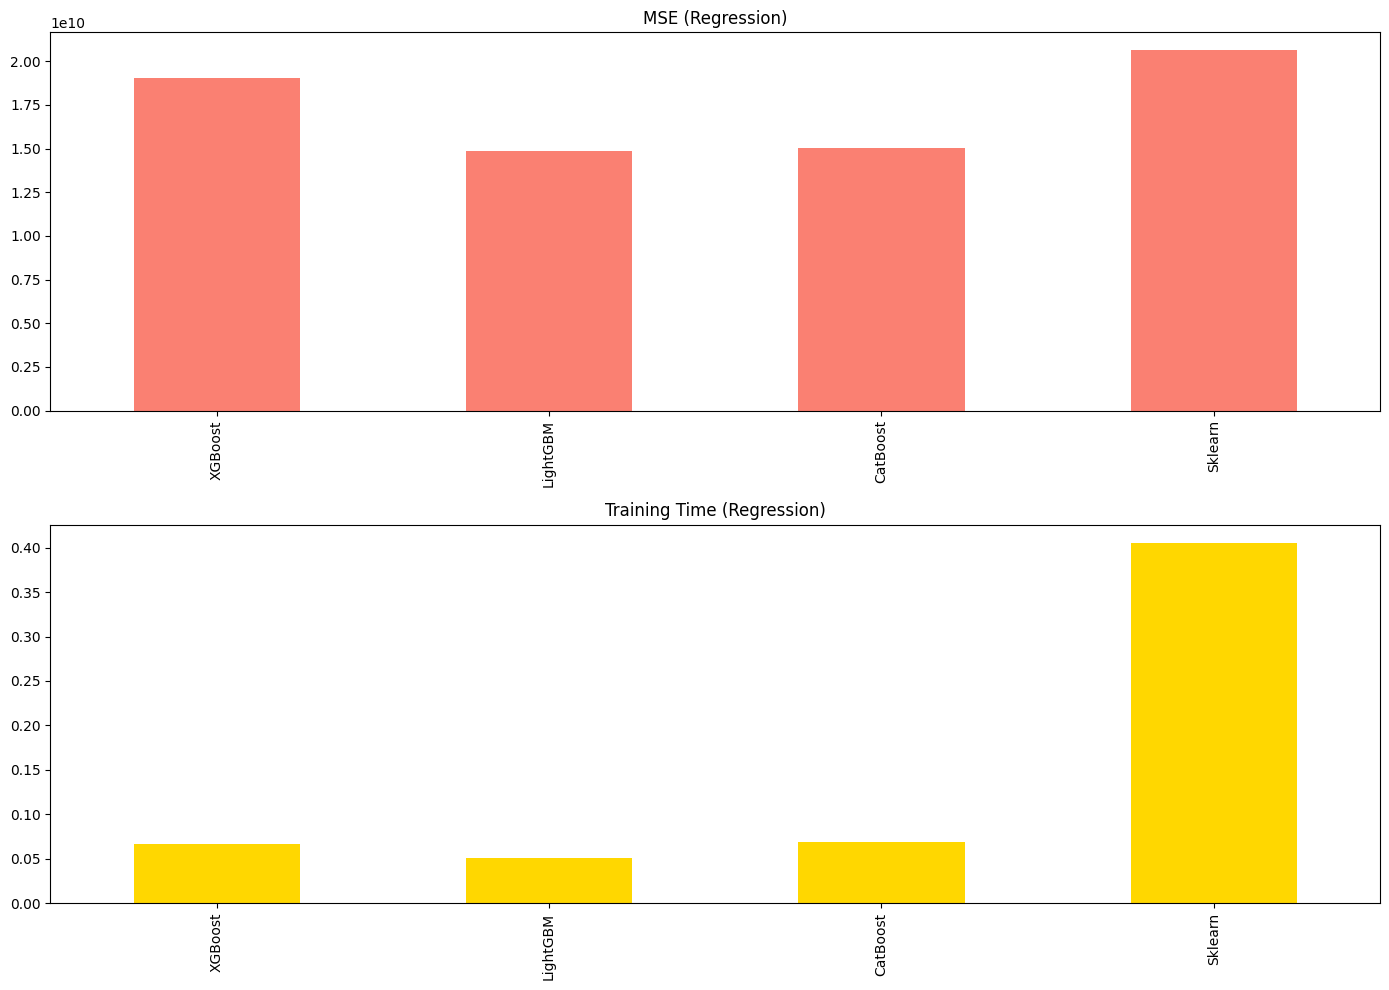

In [646]:
# Создаем DataFrame с результатами
df_regress = pd.DataFrame(results).T

# Графики точности и времени обучения
fig, axes = plt.subplots(2, figsize=(14, 10))

# Регрессия
df_regress['MSE'].plot(kind='bar', ax=axes[0], title='MSE (Regression)', color='salmon')
df_regress['time'].plot(kind='bar', ax=axes[1], title='Training Time (Regression)', color='gold')

plt.tight_layout()
plt.show()